In [5]:
!uv add numpy matplotlib sympy

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Resolved 46 packages in 7ms
Audited 13 packages in 0.05ms


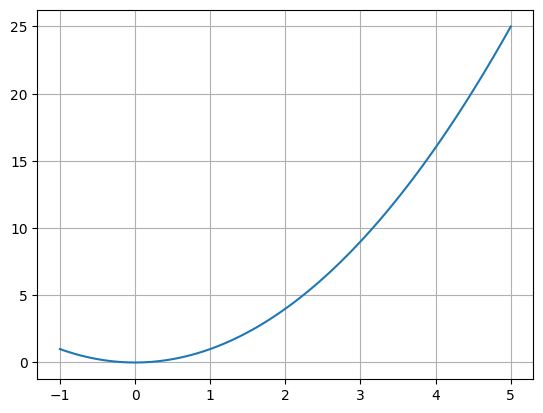

In [10]:


# Definire una funzione simbolica
x = sp.Symbol('x')
f = x**2

# Calcolare derivata
f_prime = sp.diff(f, x)

# Creare grafico
x_vals = np.linspace(-1, 5, 100)
y_vals = [float(f.subs(x, val)) for val in x_vals]

plt.plot(x_vals, y_vals)
plt.grid(True)
plt.show()